[[1.    0.988 0.951 0.891 0.809 0.707 0.588 0.454 0.309 0.156 0.   ]
 [0.844 0.841 0.815 0.769 0.702 0.616 0.514 0.398 0.272 0.138 0.   ]
 [0.695 0.698 0.681 0.646 0.593 0.523 0.438 0.34  0.232 0.118 0.   ]
 [0.556 0.563 0.554 0.529 0.488 0.432 0.363 0.283 0.193 0.098 0.   ]
 [0.432 0.441 0.437 0.419 0.388 0.345 0.291 0.227 0.156 0.079 0.   ]
 [0.322 0.332 0.331 0.32  0.298 0.265 0.224 0.175 0.12  0.061 0.   ]
 [0.229 0.238 0.239 0.232 0.217 0.194 0.164 0.129 0.088 0.045 0.   ]
 [0.151 0.159 0.16  0.156 0.146 0.131 0.111 0.087 0.06  0.031 0.   ]
 [0.088 0.093 0.095 0.093 0.087 0.078 0.066 0.052 0.036 0.018 0.   ]
 [0.038 0.041 0.042 0.041 0.038 0.035 0.029 0.023 0.016 0.008 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


<IPython.core.display.Javascript object>


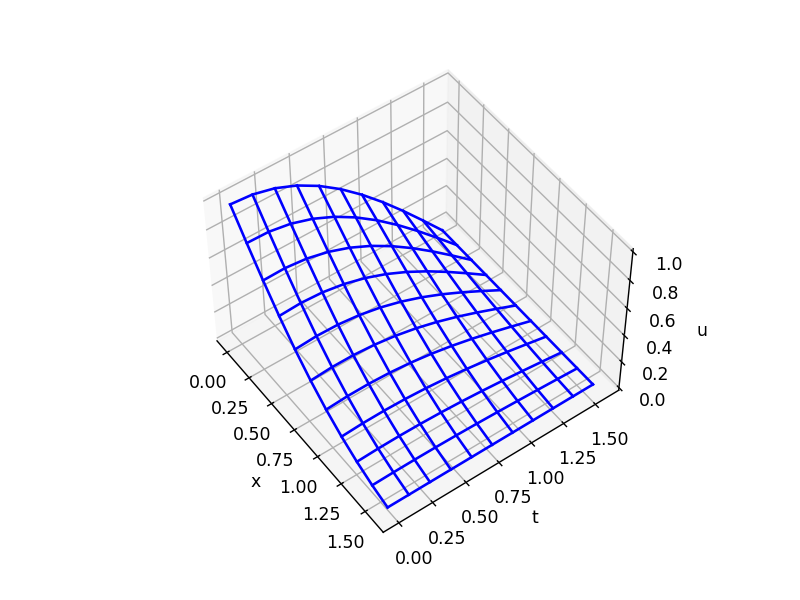

In [2]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt

# Initial data
a = -2
b = 0
c = -3
eps = 0.001
N_x = 10
N_y = 10
l_x = math.pi/2
l_y = math.pi/2
h_x = l_x / N_x
h_y = l_y / N_y

first = (1/(h_x*h_x)) - (a/h_x)
second = (1/(h_y*h_y)) - (b/h_y)
dev = (2/(h_x*h_x)) + (2/(h_y*h_y)) - (a/h_x) - (b/h_y) + c

u_mesh = np.zeros((N_x + 1, N_y + 1))  # Finite-difference mesh


def draw_u(u):
    x = [h_x * i for i in range(N_x + 1)] * (N_y + 1)
    y = np.zeros((N_x + 1) * (N_y + 1))
    i = 0
    j = 0
    while i < (N_x + 1) * (N_y + 1):
        y[i] = h_y * j
        i += 1
        if i % (N_x + 1) == 0:
            j += 1

    z = np.zeros((N_x + 1) * (N_y + 1))
    k = 0
    n = 0
    for i in range((N_x + 1) * (N_y + 1)):
        z[i] = u[n][k]
        n += 1
        if n % (N_x + 1) == 0:
            n = 0
            k += 1

    x2 = np.zeros((N_x + 1) * (N_y + 1))
    i = 0
    j = 0
    while i < (N_x + 1) * (N_y + 1):
        x2[i] = h_x * j
        i += 1
        if i % (N_y + 1) == 0:
            j += 1

    y2 = [h_y * i for i in range(N_y + 1)] * (N_x + 1)

    z2 = np.zeros((N_x + 1) * (N_y + 1))
    i = 0
    j = 0
    r = 0
    while r < (N_x + 1) * (N_y + 1):
        z2[r] = z[i * (N_x + 1) + j]
        r += 1
        i += 1
        if r % (N_y + 1) == 0:
            i = 0
            j += 1

    ax = plt.axes(projection="3d")
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    for i in range(N_y + 1):
        ax.plot3D(x[(N_x + 1) * i:(N_x + 1) * (i + 1)], y[(N_x + 1) * i:(N_x + 1) * (i + 1)], z[(N_x + 1) * i:(N_x + 1) * (i + 1)],
                  'blue')
    for i in range(N_x + 1):
        ax.plot3D(x2[(N_y + 1) * i:(N_y + 1) * (i + 1)], y2[(N_y + 1) * i:(N_y + 1) * (i + 1)],
                  z2[(N_y + 1) * i:(N_y + 1) * (i + 1)], 'blue')
    plt.show()


def create_u(u):
    for i in range(N_x + 1):  # Boundary conditions for x
        u[i][0] = math.exp(-(i*h_x)) * math.cos(i*h_x)
        u[i][N_y] = 0
    for j in range(1, N_y):  # Boundary conditions for y
        u[0][j] = math.cos(j*h_y)
        u[N_x][j] = 0

    # Simple-iteration method
    u_prev = u.copy()
    for i in range(1, N_x):
        for j in range(1, N_y):
            u_prev[i][j] = 1.0  # Initial approximation

    while True:
        for i in range(1, N_x):
            for j in range(1, N_y):
                u[i][j] = (u_prev[i+1][j]*first + (u_prev[i-1][j]/(h_x*h_x)) + u_prev[i][j+1]*second + (u_prev[i][j-1]/(h_y*h_y))) / dev

        max_u = 0
        for i in range(1, N_x):
            for j in range(1, N_y):
                if max_u < abs(u[i][j] - u_prev[i][j]):
                    max_u = abs(u[i][j] - u_prev[i][j])
        if max_u <= eps:
            break
        else:
            u_prev = u.copy()

    print(np.around(u, 3))
    draw_u(u)


create_u(u_mesh)